### Ian Chow

### CTA200

### Assignment 3

Import packages as needed:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# set font size in graphs to be bigger
plt.rc('font', size = 16)

## Part 1

For each point in the complex plane $c = x + iy$, with $-2 < x < 2$ and $-2 < y < 2$, set $z_0 = 0$ and iterate the equation $z_{i + 1} = z_i^2 + c$. 
Note what happens to the $z_i$'s: some points will remain bounded in absolute value $|z|^2 = \Re(z)^2 + \Im(z)^2$, while others will run off to infinity. 
Make an image  in which your points $c$ that diverge are given one color and those that stay bounded are given another.
Make a second image where the points are coloured by a colourscale that indicates the iteration number at which the given point diverged.

For this question, put the code that does the iteration in a function and place this function in a separate .py file which you import in your .ipynb.
Perform the plots in the notebook.

The `quad_map_colouring()` function that performs the iteration is in the `quad_map_colouring.py` file:

**TODO: put this in a .py file and add docs for the function** 

In [3]:
npoints = 1000  # number of points in the x and y domain each
NITERS = 100  # number of iterations to use in the z_i equation iteration
Z0=0 + 0j  # starting value of z0
EPSILON = 1e-6  # error tolerance to determine if convergence has occurred

real, imag = np.linspace(-2, 2, npoints), np.linspace(-2, 2, npoints)
cs = np.array([complex(x, y) for x in real for y in imag])  # construct grid of points using list comprehension

# define the z_{i + 1} equation to iterate over

def quad_map_colouring(c, z0=Z0, niters=NITERS):
    """
    write docs
    
    assigns each point a colour either red if it diverges or blue if it converges
    """
    zi = np.array([z0] * niters)  # initialize the zi array
    for i in range(1, niters):  # start at 1 since 0th element is z0
        zi[i] = (zi[i - 1] ** 2) + c  # iterative step
        if np.abs(zi[i]) > 2 * np.sqrt(2):
            return i  # if diverges after a certain number of iterations, return the iteration number at which it diverges
    # if hasn't diverged after n iterations, return -1
    return -1  # -1 represents convergence

Compute the colour array using the `quad_map_colouring()` function:

In [4]:
# compute the colour array for all the points using quad_map_colouring
colour_array = np.array([quad_map_colouring(c) for c in cs])

The first plot is below. Points $c$ that converge are coloured black, while points that diverge are coloured white,

<ipython-input-5-329a56efb9fa>:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('quad_map_colouring_bw.png', fmt='png')


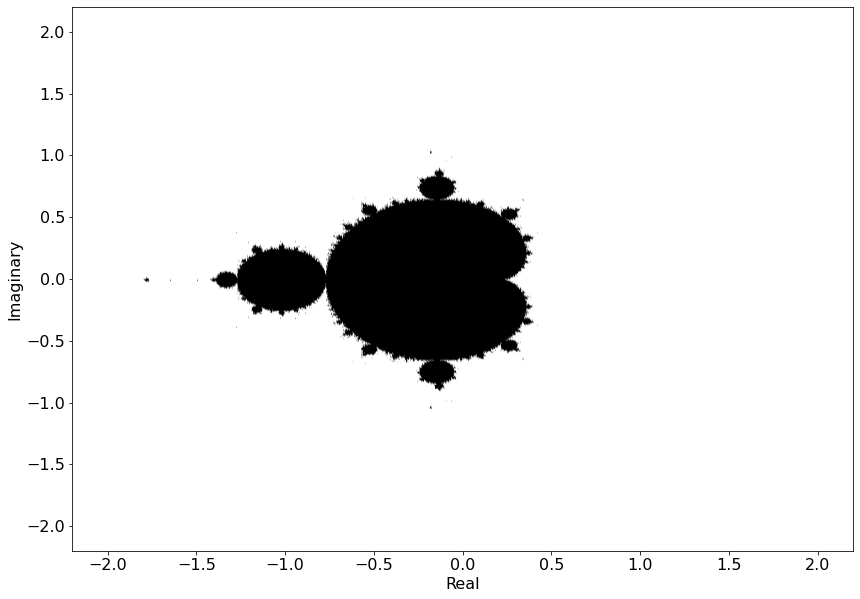

In [5]:
# first plot
plt.figure(figsize = (14, 10))
# this colours it so that values of -1 (convergence) are black and any higher values (divergence) are white
plt.scatter(cs.real, cs.imag, c=colour_array, cmap=plt.cm.get_cmap('binary_r'), vmin=-1, vmax=1)
plt.xlabel('Real'), plt.ylabel('Imaginary')
plt.savefig('quad_map_colouring_bw.png', fmt='png')

The second plot is below. Points $c$ that converge are coloured with a very dark blue in the center, while points that diverge are coloured depending on the iteration number at which they diverged, indicated by the colourbar on the right side of the graph. The colourbar is only scaled to a maximum of $25$ iterations (to improve contrast), although some points near the boundary of the set may take more than $25$ iterations to diverge.

<ipython-input-6-4e90ee2ca439>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('quad_map_colouring_scale.png', fmt='png')


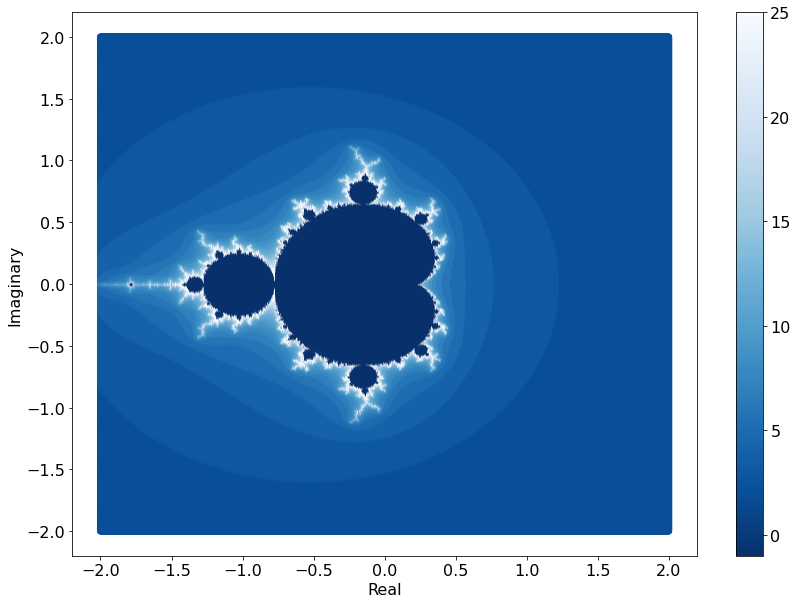

In [6]:
plt.figure(figsize = (14, 10))
plt.scatter(cs.real, cs.imag, c=colour_array, cmap=plt.cm.get_cmap('Blues_r'), vmin=-1, vmax=25)
plt.xlabel('Real'), plt.ylabel('Imaginary')
plt.colorbar()  # display the colourbar this time
plt.savefig('quad_map_colouring_scale.png', fmt='png')

## Part 2

The function `lorenz_equations()` is below:

In [7]:
def lorenz_equations(t, xyz, sigma, r, b):
    """
    write docs
    """
    x, y, z = xyz  # tuple unpack
    
    xdot = -sigma * (x - y)
    ydot = (r * x) - y  - (x * z)
    zdot = -(b * z) + (x * y)
    
    return [xdot, ydot, zdot]

We use `scipy.integrate.solve_ivp()` to integrate the equations for $t = 60$ in dimensionless time units, with Lorenz' initial conditions defined as $W_0 = [0, 1, 0]$ and the parameter values $[\sigma, r, b] = [10, 28, 8/3]$ as required.

In [22]:
from scipy.integrate import solve_ivp

ivp_ts = [0., 60.]  # times to integrate over
w0 = [0., 1., 0.]  # w0 values
params = (10., 28., 8./3.)  # params sigma, r, b

# solving the ivp
lorenz_sols = solve_ivp(lorenz_equations, ivp_ts, w0, args=params, dense_output=True)

Now reproducing Lorenz' Figure $1$ using our solutions, we have:

**TODO: set xlabel and other stuff, also just check to make sure if this is correct...**

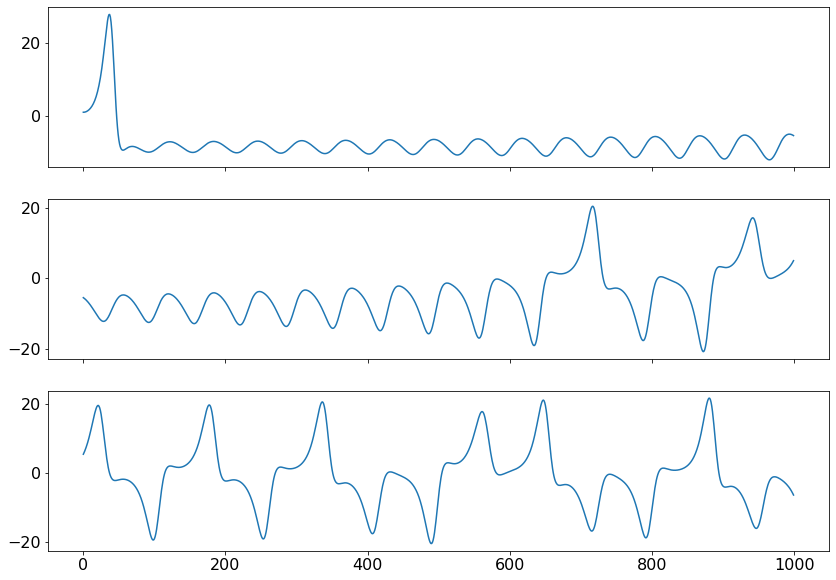

In [23]:
ntimes = 6000  # use 60000 iterations
times = np.linspace(ivp_ts[0], ivp_ts[-1], ntimes)  # array of times to plot over
delta_t = 0.01  # given in assignment

# divide N = t/delta_t, so:
ns = times/delta_t  # for plotting

# get the solutions for the lorenz equations for times
xs, ys, zs = lorenz_sols.sol(times)

# # plotting:
fig, (yax_1, yax_2, yax_3) = plt.subplots(3, 1, sharex=True, figsize = (14, 10))
# plot the first 3000 steps of iteration in the same way as Lorenz
yax_1.plot(ns[0:1000], ys[0:1000])
yax_2.plot(ns[0:1000], ys[1000:2000])  # use 0:1000 for the first ones to make sure the axes are shared
yax_3.plot(ns[0:1000], ys[2000:3000])  # like in Lorenz's Fig. 1
# make sure to set xlabel!


Now reproduce Figure $2$:

(Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'))

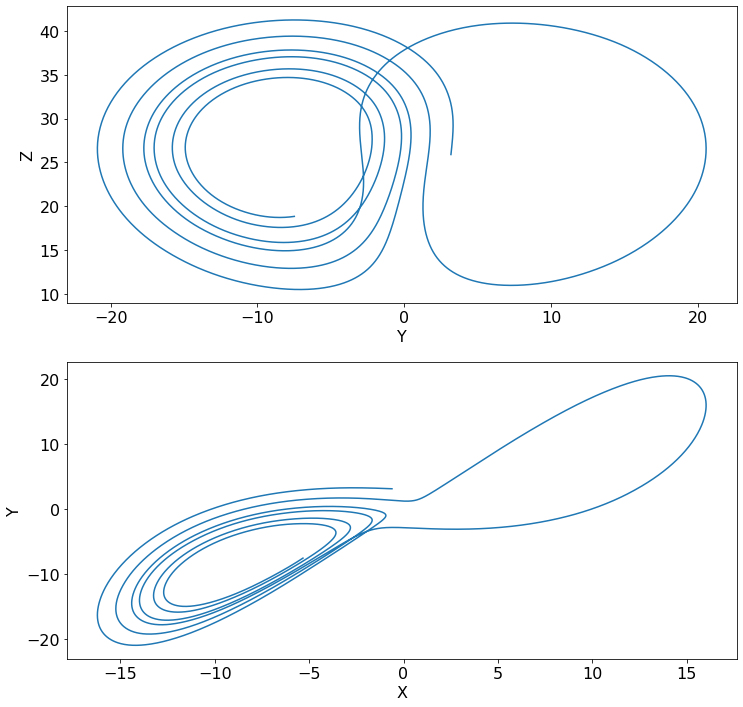

In [24]:
times2 = np.linspace(14, 19, ntimes)
# compute N again
ns2 = times2/delta_t

xs2, ys2, zs2 = lorenz_sols.sol(times2)


# plotting like Lorenz's Fig. 2
fig, (yz_ax, xy_ax) = plt.subplots(2, 1, figsize = (12, 12))
# plot the yz plane
yz_ax.plot(ys2, zs2)
yz_ax.set_xlabel('Y'), yz_ax.set_ylabel('Z')
# plot the xy plane
xy_ax.plot(xs2, ys2)
xy_ax.set_xlabel('X'), xy_ax.set_ylabel('Y')

Find solution for $W_0' = W_0 + [0, 1e-8, 0]$

In [59]:
w0_prime = [a + b for a, b in zip(w0, [0, 1e-8, 0])]
# solve for solutions from w0 prime, and compare to for w0
lorenz_sols_prime = solve_ivp(lorenz_equations, ivp_ts, w0_prime, args=params, dense_output=True)

# compute ws, w_primes
ws = lorenz_sols.sol(times)
w_primes = lorenz_sols_prime.sol(times)
# find the distance between w and w prime as a function of time

# first compute norms for w and w prime vectors
w_norms = np.array([np.linalg.norm(row) for row in ws.T])
w_prime_norms = np.array([np.linalg.norm(row) for row in w_primes.T])
# then compute the distance between W and W' for each value, for plotting this against time
distances = np.abs(w_norms - w_prime_norms)

Text(0, 0.5, "Distance between W, W'")

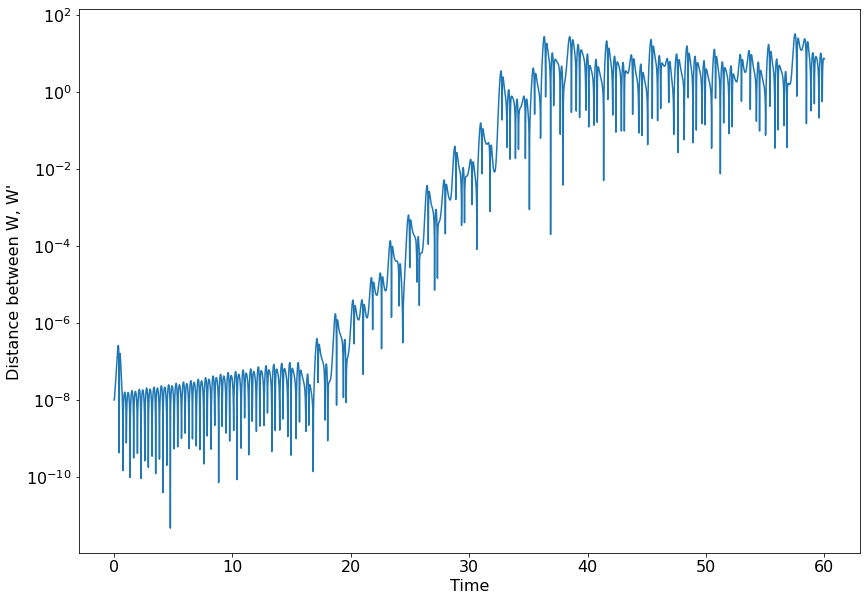

In [62]:
# plotting:
plt.figure(figsize = (14, 10))
plt.yscale('log')  # semilog scale (linear time, log distance)
plt.plot(times, distances)
plt.xlabel('Time')
plt.ylabel('Distance between W, W\'')